#                             Network Traffic Classification IN SDN

## Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report,plot_confusion_matrix

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sb

## Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path1='/content/drive/MyDrive/Thesis/Day1.csv'
path2='/content/drive/MyDrive/Thesis/Day2.csv'
path3='/content/drive/MyDrive/Thesis/Day3.csv'

In [ ]:
df1=pd.read_csv(path1)
df2=pd.read_csv(path2)
df3=pd.read_csv(path2)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (68,69,72,73,98,99,100,101,109,110,111,208,224,225,226,227,234,235,236,237,242,243,244,245,246,247) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (68,69,72,73,98,99,100,101,109,110,111,224,225,226,227,234,235,236,237,242,243,244,245,246,247) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df=pd.concat([df1,df2,df3],ignore_index=True)

In [ ]:
df.head()

,4,8,13,14,15,16,17,18,19,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,43,44,45,46,47,48,49,50,51,52,...,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266
0,80,16945,0.000152,0.000683,0.002332,0.045501,0.006292,0.199639,0.007419,60,60.0,60.0,104.7,60.0,373,10660.455556,40,40.0,40.0,86.7,44.0,359,11064.900000,14,16.0,20.0,18.0,20.0,20,7.111111,5,5,4,5,2,1,0,0,0,0,...,0,0.0,0.409508,0.0,0.0,0.0,3638.825833,2109.252458,2109.252458,0,0.010,0.454229,0.009087,0.773541,0.006690,0.971797,0.0037,1.09759,0.001229,0,0.005,0.454229,0.004471,0.773541,0.003092,0.971797,0.001434,1.09759,0.000665,0,0.005,1.487655,1.570266,0.773541,0.00365,0.971797,0.00243,1.09759,0.001423,WWW
1,80,16913,0.000161,0.000676,0.001589,0.045358,0.005105,0.199854,0.007504,60,60.0,60.0,104.8,60.0,373,10680.400000,40,40.0,40.0,86.8,44.0,359,11085.733333,14,16.0,20.0,18.0,20.0,20,7.111111,5,5,4,5,2,1,0,0,0,0,...,0,0.0,0.408220,0.0,0.0,0.0,3655.092208,2115.848832,2115.848832,0,0.010,0.454229,0.009088,0.773541,0.006692,0.971797,0.003706,1.09759,0.001242,0,0.005,0.454229,0.004475,0.773541,0.003106,0.971797,0.001463,1.09759,0.000692,0,0.005,1.487655,1.570269,0.773541,0.003656,0.971797,0.002439,1.09759,0.001431,WWW
2,80,16917,0.000190,0.000322,0.001621,0.045383,0.005388,0.199375,0.007519,60,60.0,60.0,105.1,60.0,376,10860.100000,40,40.0,40.0,87.1,44.0,362,11268.100000,14,16.0,20.0,18.0,20.0,20,7.111111,5,5,4,5,2,1,0,0,0,0,...,0,0.0,0.408444,0.0,0.0,0.0,3655.639713,2122.315466,2122.315466,0,0.008,0.454229,0.007464,0.773541,0.006050,0.971797,0.004255,1.09759,0.002703,0,0.004,0.454229,0.003626,0.773541,0.002645,0.971797,0.001422,1.09759,0.000418,0,0.005,1.487655,1.570266,0.773541,0.00365,0.971797,0.00243,1.09759,0.001422,WWW
3,80,17018,0.000156,0.000269,0.001586,0.045290,0.005118,0.199557,0.007501,60,60.0,60.0,104.9,60.0,373,10700.544444,40,40.0,40.0,86.9,44.0,359,11106.766667,14,16.0,20.0,18.0,20.0,20,7.111111,5,5,4,5,2,1,0,0,0,0,...,0,0.0,0.407610,0.0,0.0,0.0,3659.513759,2115.580050,2115.580050,0,0.008,0.454229,0.007466,0.773541,0.006056,0.971797,0.004263,1.09759,0.002709,0,0.004,0.454229,0.003628,0.773541,0.002651,0.971797,0.001431,1.09759,0.000425,0,0.005,1.487655,1.570270,0.773541,0.003656,0.971797,0.00244,1.09759,0.001431,WWW
4,80,16926,0.000170,0.000312,0.002793,0.046520,0.010827,0.199397,0.007392,60,60.0,60.0,105.4,60.0,379,11041.600000,40,40.0,40.0,87.4,44.0,365,11452.266667,14,16.0,20.0,18.0,20.0,20,7.111111,5,5,4,5,2,1,0,0,0,0,...,0,0.0,0.418679,0.0,0.0,0.0,3490.627619,2032.341544,2032.341544,0,0.008,0.454229,0.007436,0.773541,0.005955,0.971797,0.004097,1.09759,0.002548,0,0.004,0.454229,0.003610,0.773541,0.002591,0.971797,0.001342,1.09759,0.00035,0,0.005,1.487655,1.570222,0.773541,0.003591,0.971797,0.002344,1.09759,0.001361,WWW


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72465 entries, 0 to 72464
Columns: 249 entries, 4 to 266
dtypes: float64(116), int64(100), object(33)
memory usage: 137.7+ MB


## Target Variable Info

In [ ]:
df['266'].value_counts()

WWW            55329
MAIL            9598
FTP-DATA        3833
DATABASE         896
FTP-PASV         731
SERVICES         646
P2P              527
MULTIMEDIA       387
FTP-CONTROL      349
ATTACK           160
INTERACTIVE        7
GAMES              2
Name: 266, dtype: int64

In [ ]:
df.shape

(72465, 249)

## Target Encoding

In [ ]:
df['266']=df['266'].astype('category')

In [ ]:
coded=df['266'].cat.codes
coded

0        11
1        11
2        11
3        11
4        11
         ..
72460     7
72461     7
72462    11
72463    11
72464    11
Length: 72465, dtype: int8

In [ ]:
unique_target=df['266'].unique()
unique_target

['WWW', 'MAIL', 'FTP-CONTROL', 'FTP-PASV', 'ATTACK', ..., 'FTP-DATA', 'MULTIMEDIA', 'SERVICES', 'INTERACTIVE', 'GAMES']
Length: 12
Categories (12, object): ['WWW', 'MAIL', 'FTP-CONTROL', 'FTP-PASV', ..., 'MULTIMEDIA',
                          'SERVICES', 'INTERACTIVE', 'GAMES']

In [ ]:
coded_maping=pd.DataFrame({'Category':unique_target,
                         'Code':coded.unique()})
coded_maping

,Category,Code
0,WWW,11
1,MAIL,7
2,FTP-CONTROL,2
3,FTP-PASV,4
4,ATTACK,0
5,P2P,9
6,DATABASE,1
7,FTP-DATA,3
8,MULTIMEDIA,8
9,SERVICES,10


## Remove Unknown Data Type

In [ ]:
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna('unknown')
    print(df[col])

0        ?
1        ?
2        ?
3        ?
4        ?
        ..
72460    ?
72461    ?
72462    Y
72463    Y
72464    Y
Name: 77, Length: 72465, dtype: object
0        ?
1        ?
2        ?
3        ?
4        ?
        ..
72460    ?
72461    ?
72462    N
72463    N
72464    N
Name: 78, Length: 72465, dtype: object
0        ?
1        ?
2        ?
3        ?
4        ?
        ..
72460    ?
72461    ?
72462    Y
72463    Y
72464    Y
Name: 79, Length: 72465, dtype: object
0        ?
1        ?
2        ?
3        ?
4        ?
        ..
72460    ?
72461    ?
72462    N
72463    N
72464    N
Name: 80, Length: 72465, dtype: object
0        ?
1        ?
2        ?
3        ?
4        ?
        ..
72460    ?
72461    ?
72462    0
72463    0
72464    0
Name: 81, Length: 72465, dtype: object
0        ?
1        ?
2        ?
3        ?
4        ?
        ..
72460    ?
72461    ?
72462    0
72463    0
72464    0
Name: 82, Length: 72465, dtype: object
0        ?
1        ?
2        ?
3      

In [ ]:
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna('unknown')
    df.drop([col],axis=1,inplace=True)

## Dataset Information After Redundant Feature


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72465 entries, 0 to 72464
Columns: 217 entries, 4 to 266
dtypes: category(1), float64(116), int64(100)
memory usage: 119.5 MB


In [ ]:
print(df.shape)

(72465, 217)


In [ ]:
df.describe()

,4,8,13,14,15,16,17,18,19,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,43,44,45,46,47,48,49,50,51,52,...,208,210,211,212,213,214,215,216,218,219,220,221,222,223,224,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,246,247,248,249,250,251,256,257,258,259
count,72465.000000,72465.000000,72465.000000,72465.000000,72465.000000,72465.000000,72465.000000,72465.000000,72465.000000,72465.000000,72465.000000,72465.000000,72465.000000,72465.000000,72465.000000,7.246500e+04,72465.000000,72465.000000,72465.000000,72465.000000,72465.000000,72465.000000,7.246500e+04,72465.000000,72465.000000,72465.000000,72465.000000,72465.000000,72465.000000,72465.000000,72465.000000,72465.000000,72465.000000,72465.000000,72465.000000,72465.000000,72465.00000,72465.000000,72465.000000,72465.000000,...,72465.000000,72465.000000,72465.000000,72465.000000,72465.000000,72465.000000,72465.000000,72465.000000,72465.000000,72465.000000,72465.000000,72465.000000,72465.000000,72465.000000,72465.000000,72465.000000,72465.000000,72465.000000,72465.000000,72465.000000,72465.000000,7.246500e+04,7.246500e+04,7.246500e+04,72465.0,72465.000000,72465.000000,72465.000000,72465.000000,72465.000000,72465.0,72465.000000,72465.000000,72465.000000,72465.000000,72465.000000,72465.0,72465.000000,72465.000000,72465.000000
mean,1463.872256,19482.506382,0.000799,0.001384,0.011778,0.277233,0.120429,3.630008,28.986283,61.967060,64.847143,156.076195,251.447948,374.649017,704.060139,1.034204e+05,43.932699,46.914559,139.896902,235.418623,360.477375,690.055889,1.042632e+05,14.004250,14.171641,16.179293,16.029325,17.932585,18.034361,5.737571,77.560091,46.488498,76.638612,46.561416,7.934575,33.280204,0.07358,0.080425,0.005837,0.000262,...,4.512362,0.000799,0.001384,0.011778,0.277233,0.120429,3.630008,28.986283,0.000799,0.001384,0.011778,0.277233,0.120429,3.630008,28.986283,0.493066,1.055071,5.773941,13.382817,4.007041,12.744684,4.495110e+04,7.368327e+03,7.368327e+03,0.0,0.056662,0.322361,0.054186,0.512936,0.049740,0.0,0.037159,0.331856,0.035488,0.525813,0.032578,0.0,0.027702,1.469579,1.567830
std,7733.015944,19291.498597,0.032326,0.035610,0.079027,1.779091,0.256553,20.243080,759.792598,2.828267,38.893272,247.437497,194.079596,460.907610,423.885961,1.536972e+05,5.639518,39.480721,248.296660,194.018463,461.022079,423.892447,1.546791e+05,0.154006,0.535536,2.769544,1.562680,2.841208,2.816591,4.125414,1874.181300,968.970089,1874.189051,968.972394,160.891057,918.081210,0.62225,1.777030,0.081093,0.031301,...,4.235272,0.032326,0.035610,0.079027,1.779091,0.256553,20.243080,759.792598,0.032326,0.035610,0.079027,1.779091,0.256553,20.243080,759.792598,1.527932,15.019408,27.865446,25.655496,23.439573,29.422449,1.241062e+05,3.343358e+04,3.343358e+04,0.0,0.154812,0.321004,0.150810,0.386151,0.143984,0.0,0.128636,0.324469,0.124882,0.390512,0.118077,0.0,0.095227,0.040419,0.038613
min,0.000000,0.000000,-0.000001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,0.000000e+00,28.000000,40.000000,40.000000,40.000000,40.000000,40.000000,0.000000e+00,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,-0.000001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000,0.000477,0.000000,0.000954,0.000000,0.0,0.000000,0.000477,0.000000,0.000954,0.000000,0.0,0.000000,0.785398,0.785398
25%,80.000000,3025.000000,0.000001,0.000152,0.000326,0.034475,0.007509,0.148786,0.004338,60.000000,60.000000,60.000000,132.565217,73.500000,465.000000,2.039747e+04,40.000000,40.000000,40.000000,115.200000,59.000000,451.000000,2.070050e+04,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,0.000000,6.000000,5.000000,5.000000,5.000000,2.000000,2.000000,0.00000

In [ ]:
df.isna()

,4,8,13,14,15,16,17,18,19,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,43,44,45,46,47,48,49,50,51,52,...,210,211,212,213,214,215,216,218,219,220,221,222,223,224,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,246,247,248,249,250,251,256,257,258,259,266
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72460,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
72461,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fal

In [ ]:
x=df.drop('266',axis=1)
y=df['266']

## Constant Feature Removal

In [ ]:
constant_feature=VarianceThreshold(threshold=0)
constant_feature.fit(x)

VarianceThreshold(threshold=0)

In [ ]:
print('Non-Constant Feature:',constant_feature.get_support().sum())

Non-Constant Feature: 205


In [ ]:
constant_list=[not temp for temp in constant_feature.get_support()]
print('Constant Feature List:',x.columns[constant_list])

Constant Feature List: Index(['87', '88', '89', '90', '115', '116', '117', '118', '236', '246',
       '256'],
      dtype='object')


In [ ]:
x_filter=constant_feature.transform(x)

## Feature Selection

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [ ]:
k_best=SelectKBest(score_func=f_classif,k=120)

In [ ]:
x_select=k_best.fit_transform(x_filter,y)

In [ ]:
score=pd.DataFrame(k_best.scores_,columns=['Score'])
columns_name=pd.DataFrame(x.columns,columns=['Feature Name'])
Feature=pd.concat([columns_name,score],axis=1)
Feature.nlargest(120,'Score')

,Feature Name,Score
0,4,8618.225702
64,87,6887.116414
128,158,5456.220476
135,166,5455.558465
68,91,5109.851408
...,...,...
177,210,267.793443
21,33,258.175054
14,26,258.126545
156,188,235.294143


## Split The Dataset

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_select,y,test_size=0.2)

In [ ]:
x_train.shape

(57972, 120)

In [ ]:
y_test.value_counts()

WWW            11112
MAIL            1885
FTP-DATA         792
DATABASE         174
FTP-PASV         146
SERVICES         123
P2P              102
MULTIMEDIA        80
FTP-CONTROL       56
ATTACK            22
GAMES              1
INTERACTIVE        0
Name: 266, dtype: int64

# Algorithms 

## Decision Tree Algorithm

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree_model=DecisionTreeClassifier()

In [ ]:
%%time
tree_model.fit(x_train,y_train)

CPU times: user 7.14 s, sys: 0 ns, total: 7.14 s
Wall time: 7.16 s


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
DTpredicted=tree_model.predict(x_test)
DTpredicted

array(['WWW', 'WWW', 'WWW', ..., 'MAIL', 'WWW', 'FTP-DATA'], dtype=object)

In [ ]:
predictions_comp=pd.DataFrame({
    'True':y_test,
    'Predicted':DTpredicted
})
predictions_comp

,True,Predicted
27747,WWW,WWW
3103,WWW,WWW
16975,WWW,WWW
64636,FTP-DATA,FTP-DATA
30444,WWW,WWW
...,...,...
14111,WWW,WWW
20818,WWW,WWW
39710,MAIL,MAIL
62642,WWW,WWW


In [ ]:
score=tree_model.score(x_test,y_test)
precent_score=score*100
print('Decision Tree Accuracy:%0.2f%%' %precent_score)

Decision Tree Accuracy:99.74%


In [ ]:
cm=confusion_matrix(DTpredicted,y_test)

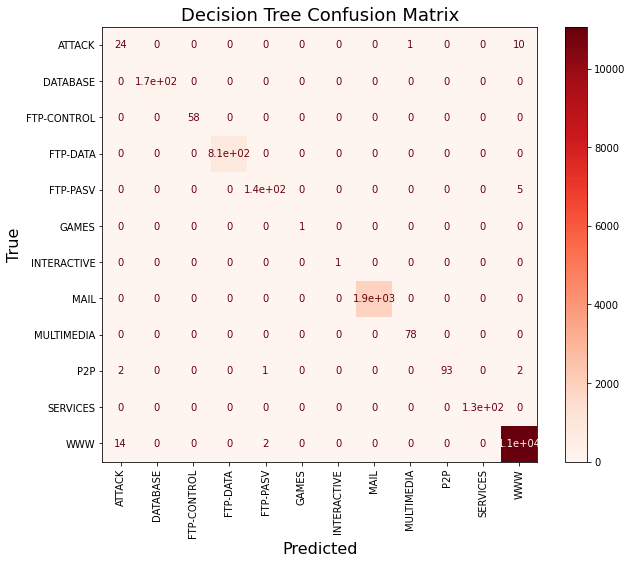

In [ ]:
dt_matrix=plot_confusion_matrix(tree_model,x_test,y_test,cmap=plt.cm.Reds)
dt_matrix.ax_.set_title('Decision Tree Confusion Matrix',fontsize=18)
plt.xlabel('Predicted',fontsize=16)
plt.ylabel('True',fontsize=16)
plt.gcf().set_size_inches(10,8)
plt.xticks(rotation=90)
plt.show()

In [ ]:
print(classification_report(y_test,DTpredicted))

              precision    recall  f1-score   support

      ATTACK       0.60      0.69      0.64        35
    DATABASE       1.00      1.00      1.00       171
 FTP-CONTROL       1.00      1.00      1.00        58
    FTP-DATA       1.00      1.00      1.00       810
    FTP-PASV       0.98      0.97      0.97       149
       GAMES       1.00      1.00      1.00         1
 INTERACTIVE       1.00      1.00      1.00         1
        MAIL       1.00      1.00      1.00      1874
  MULTIMEDIA       0.99      1.00      0.99        78
         P2P       1.00      0.95      0.97        98
    SERVICES       1.00      1.00      1.00       128
         WWW       1.00      1.00      1.00     11090

    accuracy                           1.00     14493
   macro avg       0.96      0.97      0.96     14493
weighted avg       1.00      1.00      1.00     14493



## Random Forest Algorithm

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random_forest_model=RandomForestClassifier()

In [ ]:
%%time
random_forest_model.fit(x_train,y_train)

CPU times: user 38.5 s, sys: 13.8 ms, total: 38.5 s
Wall time: 38.6 s


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
RFpredicted=random_forest_model.predict(x_test)

In [ ]:
predictions_comp=pd.DataFrame({
    'True':y_test,
    'Predicted':RFpredicted
})
predictions_comp

,True,Predicted
27747,WWW,WWW
3103,WWW,WWW
16975,WWW,WWW
64636,FTP-DATA,FTP-DATA
30444,WWW,WWW
...,...,...
14111,WWW,WWW
20818,WWW,WWW
39710,MAIL,MAIL
62642,WWW,WWW


In [ ]:
score=random_forest_model.score(x_test,y_test)
precent_score=score*100
print('Random Forest Accuracy:%0.2f%%' %precent_score)

Random Forest Accuracy:99.88%


In [ ]:
cm=confusion_matrix(y_test,RFpredicted)

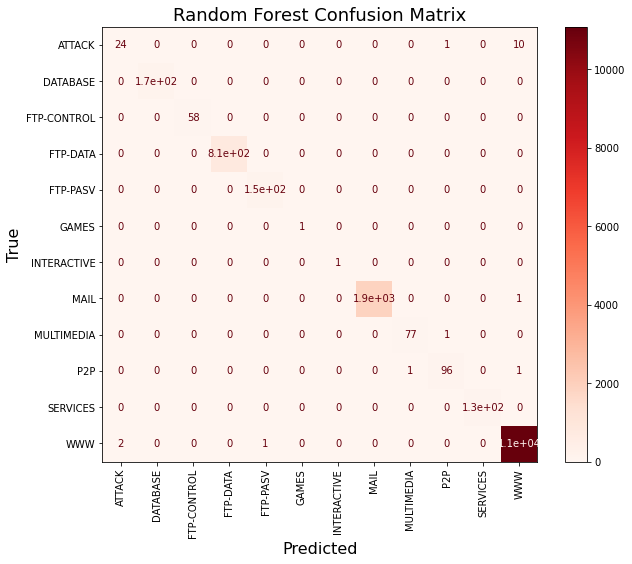

In [ ]:
rf_matrix=plot_confusion_matrix(random_forest_model,x_test,y_test,cmap=plt.cm.Reds)
rf_matrix.ax_.set_title('Random Forest Confusion Matrix',fontsize=18)
plt.xlabel('Predicted',fontsize=16)
plt.ylabel('True',fontsize=16)
plt.gcf().set_size_inches(10,8)
plt.xticks(rotation=90)
plt.show()

In [ ]:
print(classification_report(y_test,RFpredicted))

              precision    recall  f1-score   support

      ATTACK       0.92      0.69      0.79        35
    DATABASE       1.00      1.00      1.00       171
 FTP-CONTROL       1.00      1.00      1.00        58
    FTP-DATA       1.00      1.00      1.00       810
    FTP-PASV       0.99      1.00      1.00       149
       GAMES       1.00      1.00      1.00         1
 INTERACTIVE       1.00      1.00      1.00         1
        MAIL       1.00      1.00      1.00      1874
  MULTIMEDIA       0.99      0.99      0.99        78
         P2P       0.98      0.98      0.98        98
    SERVICES       1.00      1.00      1.00       128
         WWW       1.00      1.00      1.00     11090

    accuracy                           1.00     14493
   macro avg       0.99      0.97      0.98     14493
weighted avg       1.00      1.00      1.00     14493



## SVM Algorithm

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model=SVC(C=200)

In [ ]:
%%time
svm_model.fit(x_train,y_train)

CPU times: user 1min 16s, sys: 44.8 ms, total: 1min 16s
Wall time: 1min 16s


SVC(C=200, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
SVMpredicted=svm_model.predict(x_test)

In [ ]:
predictions_comp=pd.DataFrame({
    'True':y_test,
    'Predicted':SVMpredicted
})
predictions_comp

,True,Predicted
27747,WWW,WWW
3103,WWW,WWW
16975,WWW,WWW
64636,FTP-DATA,FTP-DATA
30444,WWW,WWW
...,...,...
14111,WWW,WWW
20818,WWW,WWW
39710,MAIL,MAIL
62642,WWW,WWW


In [ ]:
score=svm_model.score(x_test,y_test)
precent_score=score*100
print('SVM Accuracy Score: %.3f %% ' %precent_score)

SVM Accuracy Score: 99.117 % 


In [ ]:
cm=confusion_matrix(y_test,SVMpredicted)

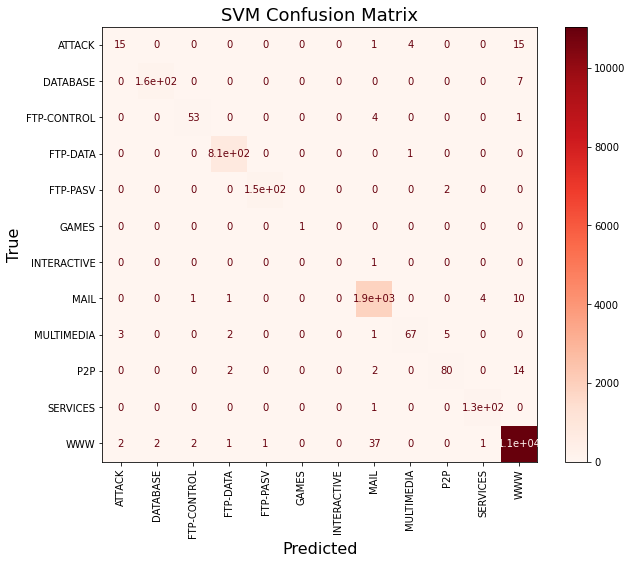

In [ ]:
svm_matrix=plot_confusion_matrix(svm_model,x_test,y_test,cmap=plt.cm.Reds)
svm_matrix.ax_.set_title('SVM Confusion Matrix',fontsize=18)
plt.xlabel('Predicted',fontsize=16)
plt.ylabel('True',fontsize=16)
plt.gcf().set_size_inches(10,8)
plt.xticks(rotation=90)
plt.show()

In [ ]:
print(classification_report(y_test,SVMpredicted))

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      ATTACK       0.75      0.43      0.55        35
    DATABASE       0.99      0.96      0.97       171
 FTP-CONTROL       0.95      0.91      0.93        58
    FTP-DATA       0.99      1.00      1.00       810
    FTP-PASV       0.99      0.99      0.99       149
       GAMES       1.00      1.00      1.00         1
 INTERACTIVE       0.00      0.00      0.00         1
        MAIL       0.98      0.99      0.98      1874
  MULTIMEDIA       0.93      0.86      0.89        78
         P2P       0.92      0.82      0.86        98
    SERVICES       0.96      0.99      0.98       128
         WWW       1.00      1.00      1.00     11090

    accuracy                           0.99     14493
   macro avg       0.87      0.83      0.85     14493
weighted avg       0.99      0.99      0.99     14493

